# **주요 내용**

*   branch를 갖는 모델 설계 후 실험



In [1]:
notebookName = "20200523_3"
notebookName

'20200523_3'

In [2]:
import tensorflow as tf
tf.__version__

'2.2.0'

In [3]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 15486994744196211431, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 9377376886539294310
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 8530834277042555745
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 15701463552
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 16454384402532176896
 physical_device_desc: "device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0"]

In [4]:
import platform
platform.platform()

'Linux-4.19.104+-x86_64-with-Ubuntu-18.04-bionic'

In [5]:
!nvidia-smi

Sat May 23 11:37:30 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.82       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P0    32W / 250W |    353MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


**파일 압축 해제 (드라이브에는 *.zip 파일 형식으로 저장되어 있음)**

In [7]:
import os

pcm_path = "./pcm_dataset"
wav_path = "./wav_dataset"

# mkdir
if not os.path.exists(pcm_path): os.mkdir(pcm_path)
if not os.path.exists(wav_path): os.mkdir(wav_path)

# unzip with quite mode (-q options)
!unzip -q "/content/drive/My Drive/ETRI/9_voice_download_4_Korean_English_by_Korean_part2.zip" -d "./pcm_dataset"

print(os.listdir(pcm_path)[:5])
print(len(os.listdir(pcm_path)))

['GSF08333KJH0', 'GSM07355MIW0', 'I4F03423KSR0', 'GSM03224CHD0', 'GSF05134JHK0']
50


***.pcm to *.wav**

In [8]:
import wave

for i, folder_path in enumerate(sorted(os.listdir(pcm_path))): # sorted!!!
    print("{}\t{}".format(i, folder_path))

    file_list = os.listdir(os.path.join(pcm_path, folder_path)) # label's path
    file_list_pcm = [files for files in file_list if files.endswith(".pcm")] # *.pcm files

    for j, file_path in enumerate(sorted(file_list_pcm)): # sorted!!!
        with open(os.path.join(pcm_path, folder_path, file_path), "rb") as pcm_file:
            pcm_data = pcm_file.read()
        # save as {label}_{features}.wav format
        with wave.open(os.path.join(wav_path, "{}_{}.wav".format(i, j)), 'wb') as wav_file:
            wav_file.setparams((1, 2, 16000, 0, 'NONE', 'NONE')) # 16kHz, mono channel
            wav_file.writeframes(pcm_data)

0	GSF03031LJH0
1	GSF03732JJH0
2	GSF04122LHK0
3	GSF04524CJI0
4	GSF04623LWJ0
5	GSF04923PEY0
6	GSF05134JHK0
7	GSF05432KSY0
8	GSF05733HBH0
9	GSF05844LJR0
10	GSF06654KES0
11	GSF06742CKA0
12	GSF06833JYK0
13	GSF06934SYN0
14	GSF07132LCY0
15	GSF08142LDH0
16	GSF08233NEH0
17	GSF08333KJH0
18	GSF09025WYY0
19	GSF09431SHY0
20	GSF09844KKS0
21	GSM02434AGS0
22	GSM02544LHS0
23	GSM03224CHD0
24	GSM03321SDK0
25	GSM03634SJY0
26	GSM03823YJK0
27	GSM04233KMS0
28	GSM04424JBRC
29	GSM05953CJH0
30	GSM06044JBY0
31	GSM06235BJH0
32	GSM07042NSK0
33	GSM07355MIW0
34	GSM09534JHD0
35	GSM09644KCK0
36	GSM09752SCY0
37	I4F02224SDY0
38	I4F02631KSM0
39	I4F02821YRR0
40	I4F02933JSI0
41	I4F03423KSR0
42	I4F03543KSY0
43	I4F03922LKY0
44	I4F04732OIY0
45	I4F05332CJH0
46	I4F05625JSY0
47	I4F07443LJA0
48	I4F07633JSI0
49	I4F07852PKJ0


In [0]:
import numpy as np

num_labels = 50
num_features = 100
data_length = 3**9  # 19,683

train_rate = 0.8
num_train_data = int(num_features * train_rate) # 80

select_train_data = [True] * num_train_data + [False] * (num_features - num_train_data)
select_test_data = [False] * num_train_data + [True] * (num_features - num_train_data)

# naming
save_train_data_name = 'train_data'
save_train_labels_name = 'train_labels'

save_test_data_name = 'test_data'
save_test_labels_name = 'test_labels'

**train data, test data로 구분하여 numpy 저장 (*.npz)**

In [10]:
# save features as *.npz format

from scipy.io import wavfile

data = np.zeros((num_labels * num_features, data_length))
labels = np.zeros((num_labels * num_features))

for i in range(num_labels):
    for j in range(num_features):
        file_name = "{}_{}.wav".format(i, j)
        sample_rate, samples = wavfile.read(os.path.join(wav_path, file_name))
        
        start = int(len(samples) - data_length) // 2
        end = start + data_length
        
        data[i * num_features + j] = samples[start:end]
        labels[i * num_features + j] = i

train_data = data[select_train_data * num_labels]
train_labels = labels[select_train_data * num_labels]

test_data = data[select_test_data * num_labels]
test_labels = labels[select_test_data * num_labels]

# save *.npy        
np.save("./" + save_train_data_name, train_data)
np.save("./" + save_train_labels_name, train_labels)

np.save("./" + save_test_data_name, test_data)
np.save("./" + save_test_labels_name, test_labels)

print("train_data.shape: {}, train_labels.shape: {}".format(train_data.shape, train_labels.shape))
print("test_data.shape: {}, test_labels.shape: {}".format(test_data.shape, test_labels.shape))

train_data.shape: (4000, 19683), train_labels.shape: (4000,)
test_data.shape: (1000, 19683), test_labels.shape: (1000,)


In [0]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

def my_split(train_data, train_labels):
    test_size = 0.2

    X_train, X_val, Y_train, Y_val = train_test_split(train_data, train_labels, test_size = test_size)

    x_train = X_train.reshape(len(X_train), data_length, 1)
    x_val = X_val.reshape(len(X_val), data_length, 1) 

    y_train = to_categorical(Y_train)
    y_val = to_categorical(Y_val)

    # standarization
    mean = x_train.mean()
    x_train -= mean
    std = x_train.std()
    x_train /= std

    x_val -= mean
    x_val /= std

    return x_train, y_train, x_val, y_val, mean, std

**Build Model**

In [0]:
def build_block(model_input, block_loop, filters_, kernel_size_, strides_):
    x = model_input
    for i in range(block_loop):
        x = layers.Conv1D(filters = filters_, kernel_size = kernel_size_, strides = strides_, padding = 'same')(x)
        x = layers.ReLU()(x)
        
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling1D(pool_size = 3)(x)

    return x

In [0]:
def build_branch_add(model_input, l_filters_, l_kernel_size_, l_strides_, r_filters_, r_kernel_size_, r_strides_):
    x = model_input

    l = layers.Conv1D(filters = l_filters_, kernel_size = l_kernel_size_, strides = l_strides_, padding = 'same')(x)
    l = layers.ReLU()(l)

    r = layers.Conv1D(filters = r_filters_, kernel_size = r_kernel_size_, strides = r_strides_, padding = 'same')(x)
    r = layers.ReLU()(r)
    
    x = layers.Add()([l, r])
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling1D(pool_size = 3)(x)

    return x

In [0]:
def build_branch_concat1(model_input, l_filters_, l_kernel_size_, l_strides_):
    x = model_input

    l = layers.Conv1D(filters = l_filters_, kernel_size = l_kernel_size_, strides = l_strides_, padding = 'same')(x)
    l = layers.ReLU()(l)

    r = layers.MaxPooling1D(pool_size = 3)(x)
    
    x = layers.Concatenate()([l, r])
    x = layers.BatchNormalization()(x)

    return x

In [0]:
def build_branch_concat2(model_input, l_filters_, l_kernel_size_, l_strides_):
    x = model_input

    l = layers.Conv1D(filters = l_filters_, kernel_size = l_kernel_size_, strides = l_strides_, padding = 'same')(x)
    l = layers.BatchNormalization()(l)
    l = layers.ReLU()(l)

    r = layers.MaxPooling1D(pool_size = 3)(x)
    
    x = layers.Concatenate()([l, r])

    return x

In [0]:
def build_model_1(model_input):

    x = build_block(model_input, 1, 32, 5, 1)
    x = build_block(x, 1, 64, 5, 1)
    x = build_block(x, 1, 128, 5, 1)
    x = build_block(x, 1, 256, 5, 1)

    # out
    x = layers.GlobalAveragePooling1D()(x)
    out = layers.Dense(num_labels, activation = 'softmax')(x)

    model = Model(model_input, out, name = "original")
    print("model name: {}".format(model.name))
    return model

In [0]:
def build_model_2(model_input):

    x = build_block(model_input, 1, 32, 5, 1)
    x = build_block(x, 1, 64, 5, 1)
    x = build_branch_concat1(x, 64, 5, 3)
    x = build_branch_concat1(x, 128, 5, 3)

    # out
    x = layers.GlobalAveragePooling1D()(x)
    out = layers.Dense(num_labels, activation = 'softmax')(x)

    model = Model(model_input, out, name = "concatenated1")
    print("model name: {}".format(model.name))
    return model

In [0]:
def build_model_3(model_input):

    x = build_block(model_input, 1, 32, 5, 1)
    x = build_block(x, 1, 64, 5, 1)
    x = build_branch_concat2(x, 64, 5, 3)
    x = build_branch_concat2(x, 128, 5, 3)

    # out
    x = layers.GlobalAveragePooling1D()(x)
    out = layers.Dense(num_labels, activation = 'softmax')(x)

    model = Model(model_input, out, name = "concatenated2")
    print("model name: {}".format(model.name))
    return model

In [0]:
from tensorflow.keras.models import Model
from tensorflow.keras import layers, Input

model_input = Input(shape = (data_length, 1))

In [34]:
model_1 = build_model_1(model_input)
model_1.summary()

model name: original
Model: "original"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 19683, 1)]        0         
_________________________________________________________________
conv1d_12 (Conv1D)           (None, 19683, 32)         192       
_________________________________________________________________
re_lu_12 (ReLU)              (None, 19683, 32)         0         
_________________________________________________________________
batch_normalization_12 (Batc (None, 19683, 32)         128       
_________________________________________________________________
max_pooling1d_12 (MaxPooling (None, 6561, 32)          0         
_________________________________________________________________
conv1d_13 (Conv1D)           (None, 6561, 64)          10304     
_________________________________________________________________
re_lu_13 (ReLU)              (None, 6

In [35]:
model_2 = build_model_2(model_input)
model_2.summary()

model name: concatenated1
Model: "concatenated1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 19683, 1)]   0                                            
__________________________________________________________________________________________________
conv1d_16 (Conv1D)              (None, 19683, 32)    192         input_2[0][0]                    
__________________________________________________________________________________________________
re_lu_16 (ReLU)                 (None, 19683, 32)    0           conv1d_16[0][0]                  
__________________________________________________________________________________________________
batch_normalization_16 (BatchNo (None, 19683, 32)    128         re_lu_16[0][0]                   
____________________________________________________________

In [36]:
model_3 = build_model_3(model_input)
model_3.summary()

model name: concatenated2
Model: "concatenated2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 19683, 1)]   0                                            
__________________________________________________________________________________________________
conv1d_20 (Conv1D)              (None, 19683, 32)    192         input_2[0][0]                    
__________________________________________________________________________________________________
re_lu_20 (ReLU)                 (None, 19683, 32)    0           conv1d_20[0][0]                  
__________________________________________________________________________________________________
batch_normalization_20 (BatchNo (None, 19683, 32)    128         re_lu_20[0][0]                   
____________________________________________________________

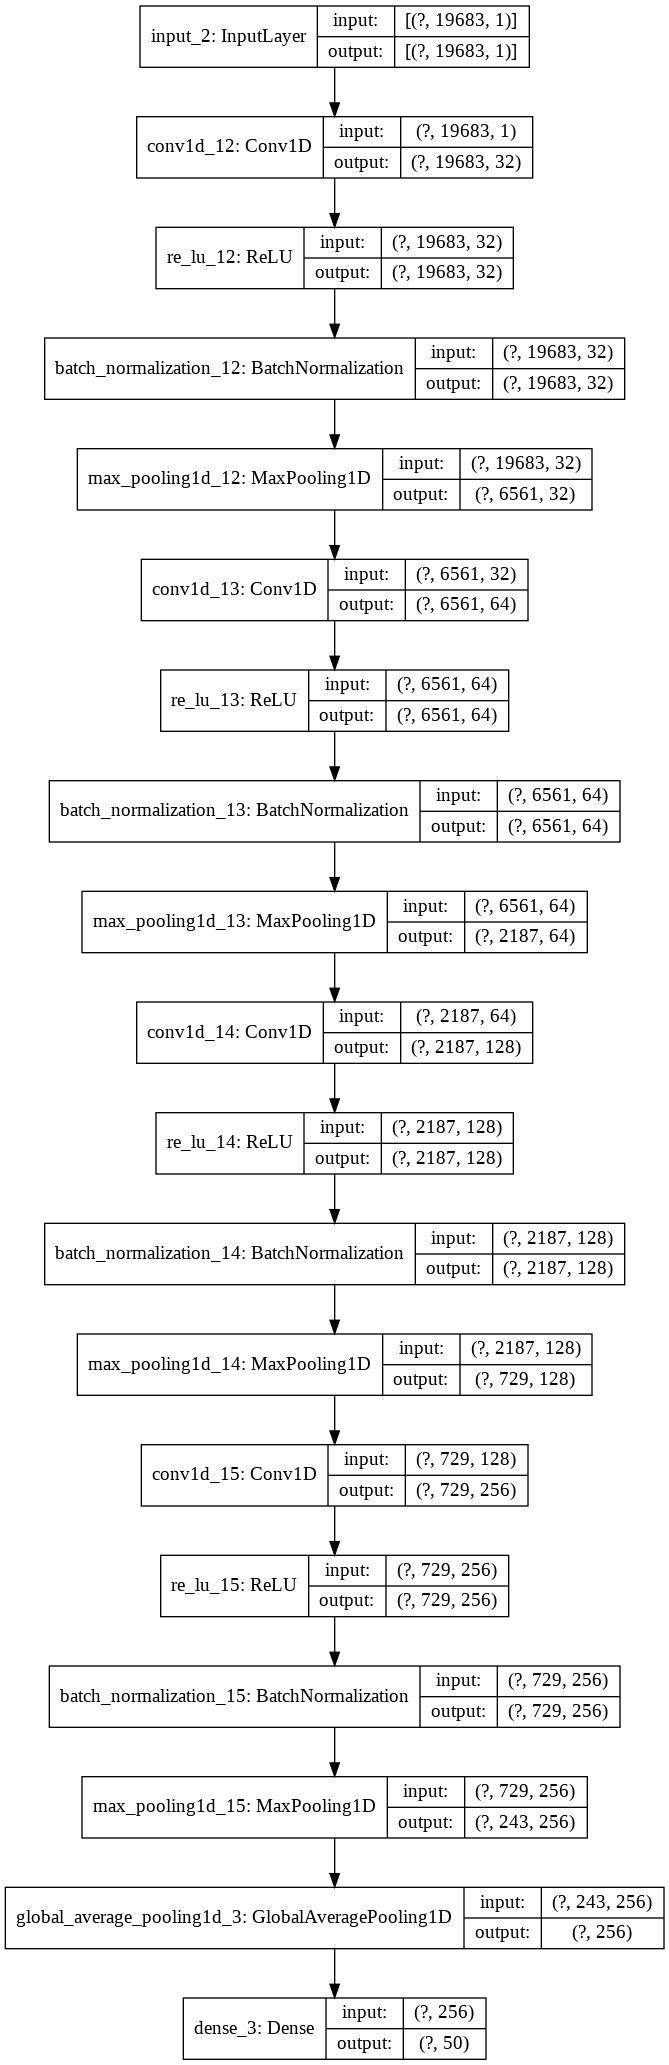

In [37]:
from tensorflow.keras.utils import plot_model

plot_model(model_1, show_shapes = True, to_file = 'model_1.png')

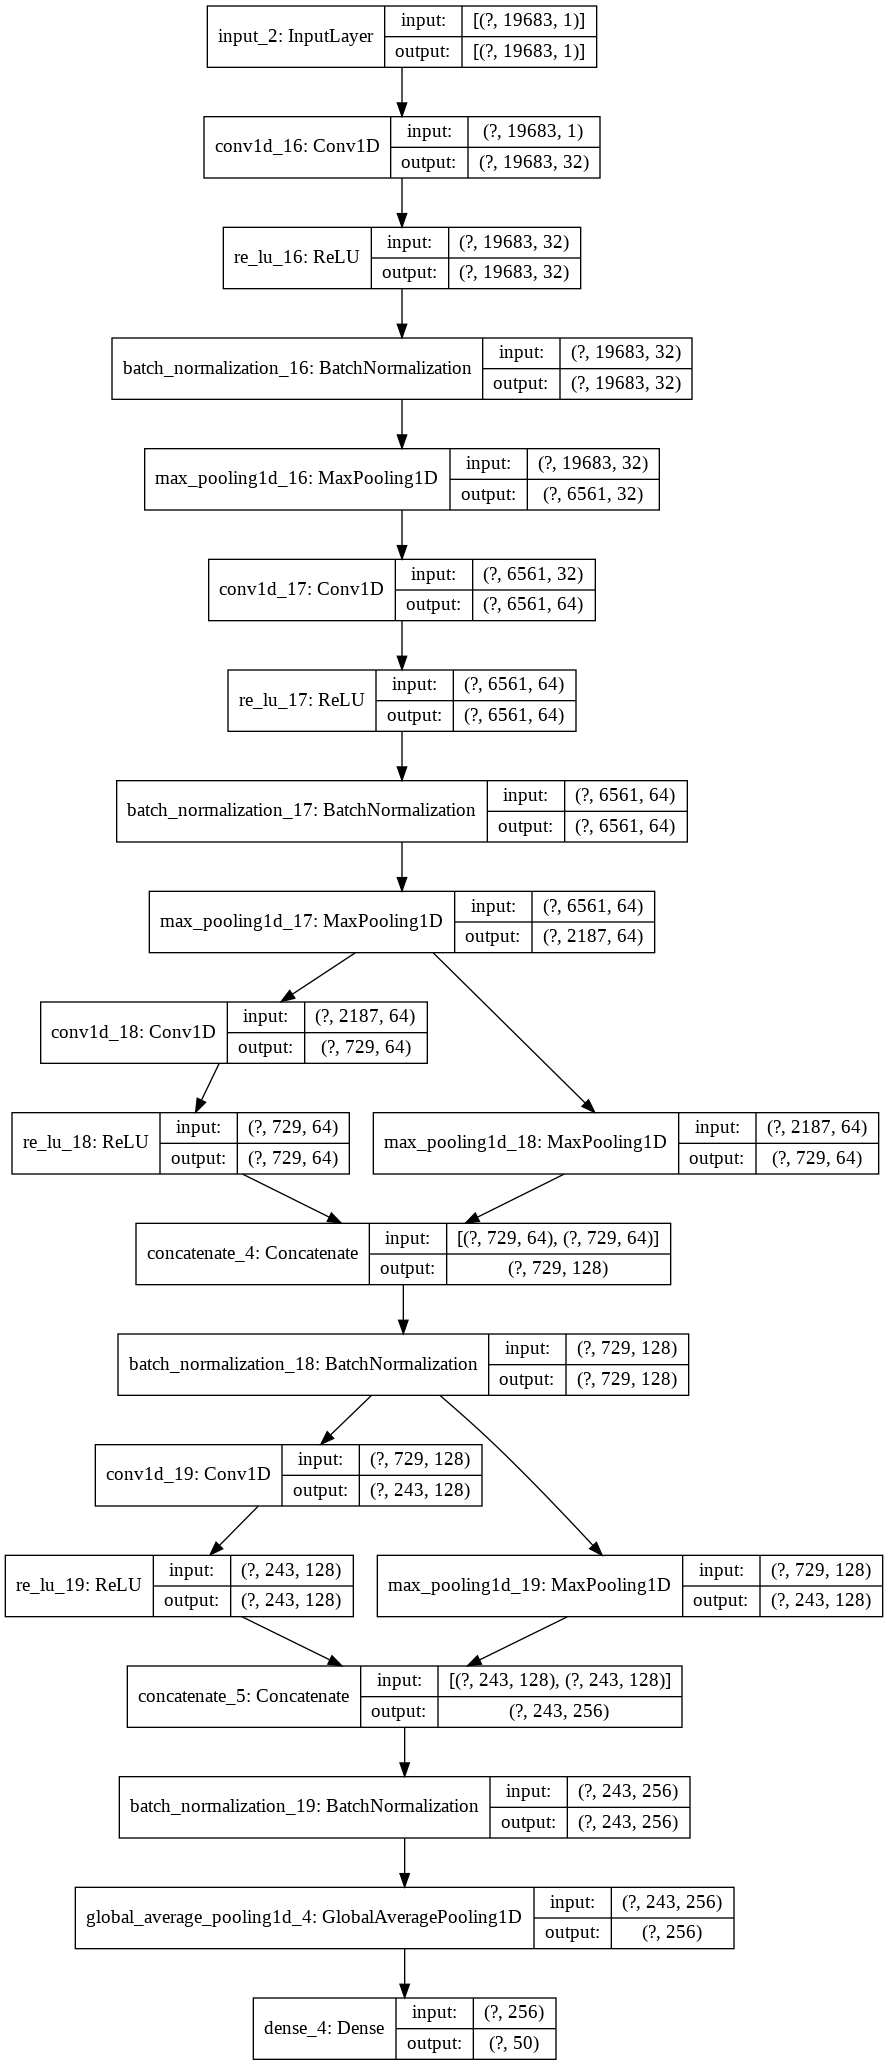

In [38]:
plot_model(model_2, show_shapes = True, to_file = 'model_2.png')

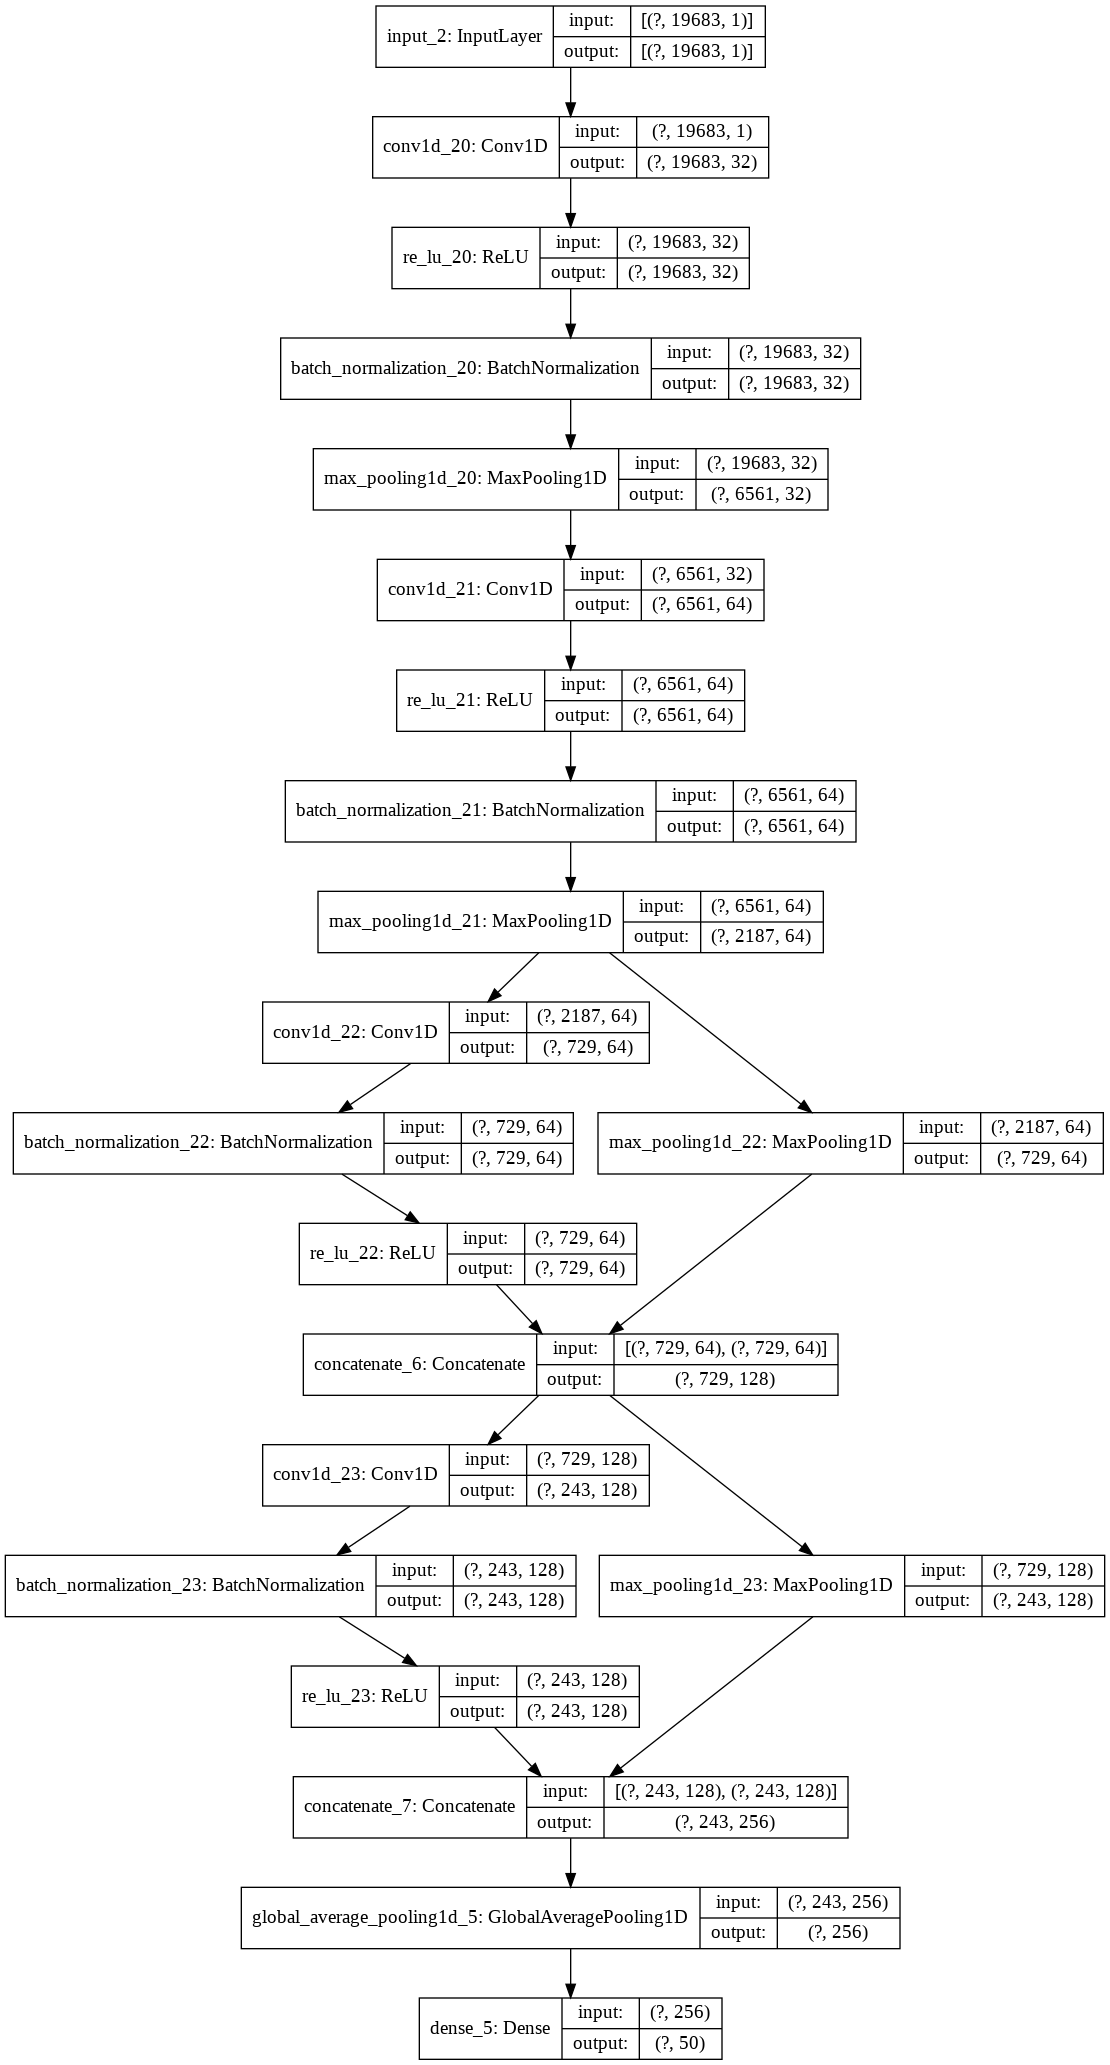

In [39]:
plot_model(model_3, show_shapes = True, to_file = 'model_3.png')

**Train model**

In [0]:
from tensorflow.keras import optimizers
from tensorflow.keras import callbacks
import time

def compile_and_train(model, x_train, y_train, x_val, y_val, batch_size, epochs): 
    # compile
    opt = optimizers.RMSprop(lr = 0.001)
    model.compile(optimizer = opt,
                  loss = 'categorical_crossentropy',
                  metrics = ['accuracy'])
    
    # save model & results
    save_model_path = os.path.join("/content/drive/My Drive/models", notebookName)
    save_results_path = os.path.join("/content/drive/My Drive/results", notebookName)

    if not os.path.exists(save_model_path):     os.mkdir(save_model_path)
    if not os.path.exists(save_results_path):   os.mkdir(save_results_path)

    save_model_path = os.path.join(save_model_path, model.name)
    save_results_path = os.path.join(save_results_path, model.name)

    if not os.path.exists(save_model_path):     os.mkdir(save_model_path)
    if not os.path.exists(save_results_path):   os.mkdir(save_results_path)

    # callback
    reduce_lr = callbacks.ReduceLROnPlateau(monitor='val_loss', factor = 0.5, patience = 20)
    checkpoint = callbacks.ModelCheckpoint(filepath = os.path.join(save_model_path, "cp-{epoch:03d}-{val_loss:.4f}.ckpt"),
                                           monitor = 'val_loss', verbose = 1, save_best_only = True, save_weights_only = True)
    
    # train & validate
    print("Train on {} samples, validate on {} samples...".format(x_train.shape[0], x_val.shape[0]))

    start = time.time()
    print("[  start time] {}".format(time.strftime('%c', time.localtime(time.time()))))
    history = model.fit(x_train, y_train,
                        validation_data = (x_val, y_val),
                        epochs = epochs,
                        batch_size = batch_size,
                        verbose = 0,
                        callbacks = [reduce_lr, checkpoint])
    end = time.time()
    print("[    end time] {}".format(time.strftime('%c', time.localtime(time.time()))))
    print("[working time] {:.2f} (sec)".format(end - start))

    # save
    # model.save(os.path.join(save_model_path, model.name) + ".h5")
    np.savez_compressed(os.path.join(save_results_path, model.name),
                        accuracy = history.history['accuracy'],
                        val_accuracy = history.history['val_accuracy'],
                        loss = history.history['loss'],
                        val_loss = history.history['val_loss'],
                        working_time = np.array([end - start]))

In [0]:
def my_evaluate(model, test_data, test_labels, batch_size):
    loss, acc = model.evaluate(test_data, test_labels, batch_size = batch_size)
    print("model name: {}, test loss: {}, test_acc: {}".format(model.name, loss, acc))

    save_eval_path = os.path.join("/content/drive/My Drive/evals", notebookName)
    if not os.path.exists(save_eval_path):     os.mkdir(save_eval_path)

    save_eval_path = os.path.join(save_eval_path, model.name)
    if not os.path.exists(save_eval_path):     os.mkdir(save_eval_path)

    pred = model.predict(test_data) # (1000, 50)
    np.save(os.path.join(save_eval_path,  model.name), pred)

**test**

In [42]:
epochs = 200
batch_size = 64
num_models = 3

# train test split
x_train, y_train, x_val, y_val, mean, std = my_split(train_data, train_labels)

# build & compile & train model
model_input = Input(shape = (data_length, 1))
models = [
          build_model_1(model_input),
          build_model_2(model_input),
          build_model_3(model_input)
          ]

for model in models:
    compile_and_train(model, x_train, y_train, x_val, y_val, batch_size, epochs)

model_names = [model.name for model in models]

model name: original
model name: concatenated1
model name: concatenated2
Train on 3200 samples, validate on 800 samples...
[  start time] Sat May 23 11:40:44 2020

Epoch 00001: val_loss improved from inf to 3.79175, saving model to /content/drive/My Drive/models/20200523_3/original/cp-001-3.7917.ckpt

Epoch 00002: val_loss did not improve from 3.79175

Epoch 00003: val_loss did not improve from 3.79175

Epoch 00004: val_loss did not improve from 3.79175

Epoch 00005: val_loss improved from 3.79175 to 3.56467, saving model to /content/drive/My Drive/models/20200523_3/original/cp-005-3.5647.ckpt

Epoch 00006: val_loss improved from 3.56467 to 3.14532, saving model to /content/drive/My Drive/models/20200523_3/original/cp-006-3.1453.ckpt

Epoch 00007: val_loss improved from 3.14532 to 2.01561, saving model to /content/drive/My Drive/models/20200523_3/original/cp-007-2.0156.ckpt

Epoch 00008: val_loss improved from 2.01561 to 1.26705, saving model to /content/drive/My Drive/models/20200523_

In [43]:
model_input = Input(shape = (data_length, 1))

new_models = [
              build_model_1(model_input),
              build_model_2(model_input),
              build_model_3(model_input)
              ]

for i, model_name in enumerate(model_names):
    checkpoint_dir = "/content/drive/My Drive/models/{}/{}".format(notebookName, model_name)
    latest = tf.train.latest_checkpoint(checkpoint_dir)

    model = new_models[i]
    model.load_weights(latest)

    opt = optimizers.RMSprop(lr = 0.001)
    model.compile(optimizer = opt,
                  loss = 'categorical_crossentropy',
                  metrics = ['accuracy'])
    
    # test_data
    test_data = np.load(save_test_data_name + ".npy")
    test_labels = np.load(save_test_labels_name + ".npy")

    test_data = test_data.reshape(len(test_data), data_length, 1)
    test_labels = to_categorical(test_labels)

    # standarization
    test_data -= mean
    test_data /= std 
    
    my_evaluate(model, test_data, test_labels, batch_size)

model name: original
model name: concatenated1
model name: concatenated2
16/16 [==============================] - 0s 22ms/step - loss: 0.0334 - accuracy: 0.9920
model name: original, test loss: 0.03344094008207321, test_acc: 0.9919999837875366
16/16 [==============================] - 0s 16ms/step - loss: 0.0320 - accuracy: 0.9920
model name: concatenated1, test loss: 0.03202856704592705, test_acc: 0.9919999837875366
16/16 [==============================] - 0s 15ms/step - loss: 0.0567 - accuracy: 0.9880
model name: concatenated2, test loss: 0.05667516589164734, test_acc: 0.9879999756813049


In [0]:
import numpy as np
import os

previous = notebookName
# num_models = 5

working_time = np.zeros((num_models))
histories = np.zeros((num_models, 4, epochs))

for i, model_name in enumerate(model_names):
    history = np.load(os.path.join("/content/drive/My Drive/results", previous, model_name, "{}.npz".format(model_name)))

    histories[i, 0] = history['accuracy']
    histories[i, 1] = history['val_accuracy']
    histories[i, 2] = history['loss']
    histories[i, 3] = history['val_loss']

    working_time[i] = history['working_time']

In [45]:
print(working_time.shape, histories.shape)

(3,) (3, 4, 200)


In [46]:
mn = ["original",
      "concatenated1", 
      "concatenated2"
      ]

for i in range(num_models):
    print("[{}] avg working time: {:.2f} sec".format(mn[i], working_time[i]))

[original] avg working time: 738.47 sec
[concatenated1] avg working time: 561.79 sec
[concatenated2] avg working time: 549.19 sec


In [0]:
import pandas as pd

def smooth_curve(points):
    # df = pd.DataFrame(points, columns = list('A'))
    # # df['A'] = df['A'].rolling(5).mean()
    # df['B'] = df['A'].ewm(10).mean()
    # return df['B'].to_numpy()
    return points

In [0]:
import matplotlib.pyplot as plt

def plot_histories(histories):
    fig = plt.figure(figsize = (10, 4), facecolor = 'white', dpi = 300)
    c = ['r', 'g', 'b', 'm', 'k', 'c']
    # l = ["--", "-", ":", "-."]
    l = ["-"] * num_models

    plt.subplot(1, 2, 1)
    for i, history in enumerate(histories):
        acc = history[0]
        val_acc = history[1]
        plt.plot(np.arange(1, len(val_acc) + 1, 1), 1 - smooth_curve(val_acc), color = c[i], label = mn[i], linewidth = 1, linestyle = l[i])
        # plt.plot(np.arange(1, len(val_acc) + 1, 1), 1 - val_acc, alpha = .3, color = c[i], linewidth = .5, linestyle = l[i])
    plt.title('Validation Error')
    plt.xlabel('Epochs')
    plt.ylabel('Error Rate')
    plt.ylim([-0.03, 1.03])
    # plt.yscale('log')
    plt.legend()
    plt.grid(True, linewidth = 0.4)

    plt.subplot(1, 2, 2)
    for i, history in enumerate(histories):
        loss = history[2]
        val_loss = history[3]
        plt.plot(np.arange(1, len(val_loss) + 1, 1), smooth_curve(val_loss), color = c[i], label = mn[i], linewidth = 1, linestyle = l[i])
        # plt.plot(np.arange(1, len(val_loss) + 1, 1), val_loss, alpha = .3, color = c[i], linewidth = .5, linestyle = l[i])
    plt.title('Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True, linewidth = 0.4)

    plt.tight_layout()
    plt.show()

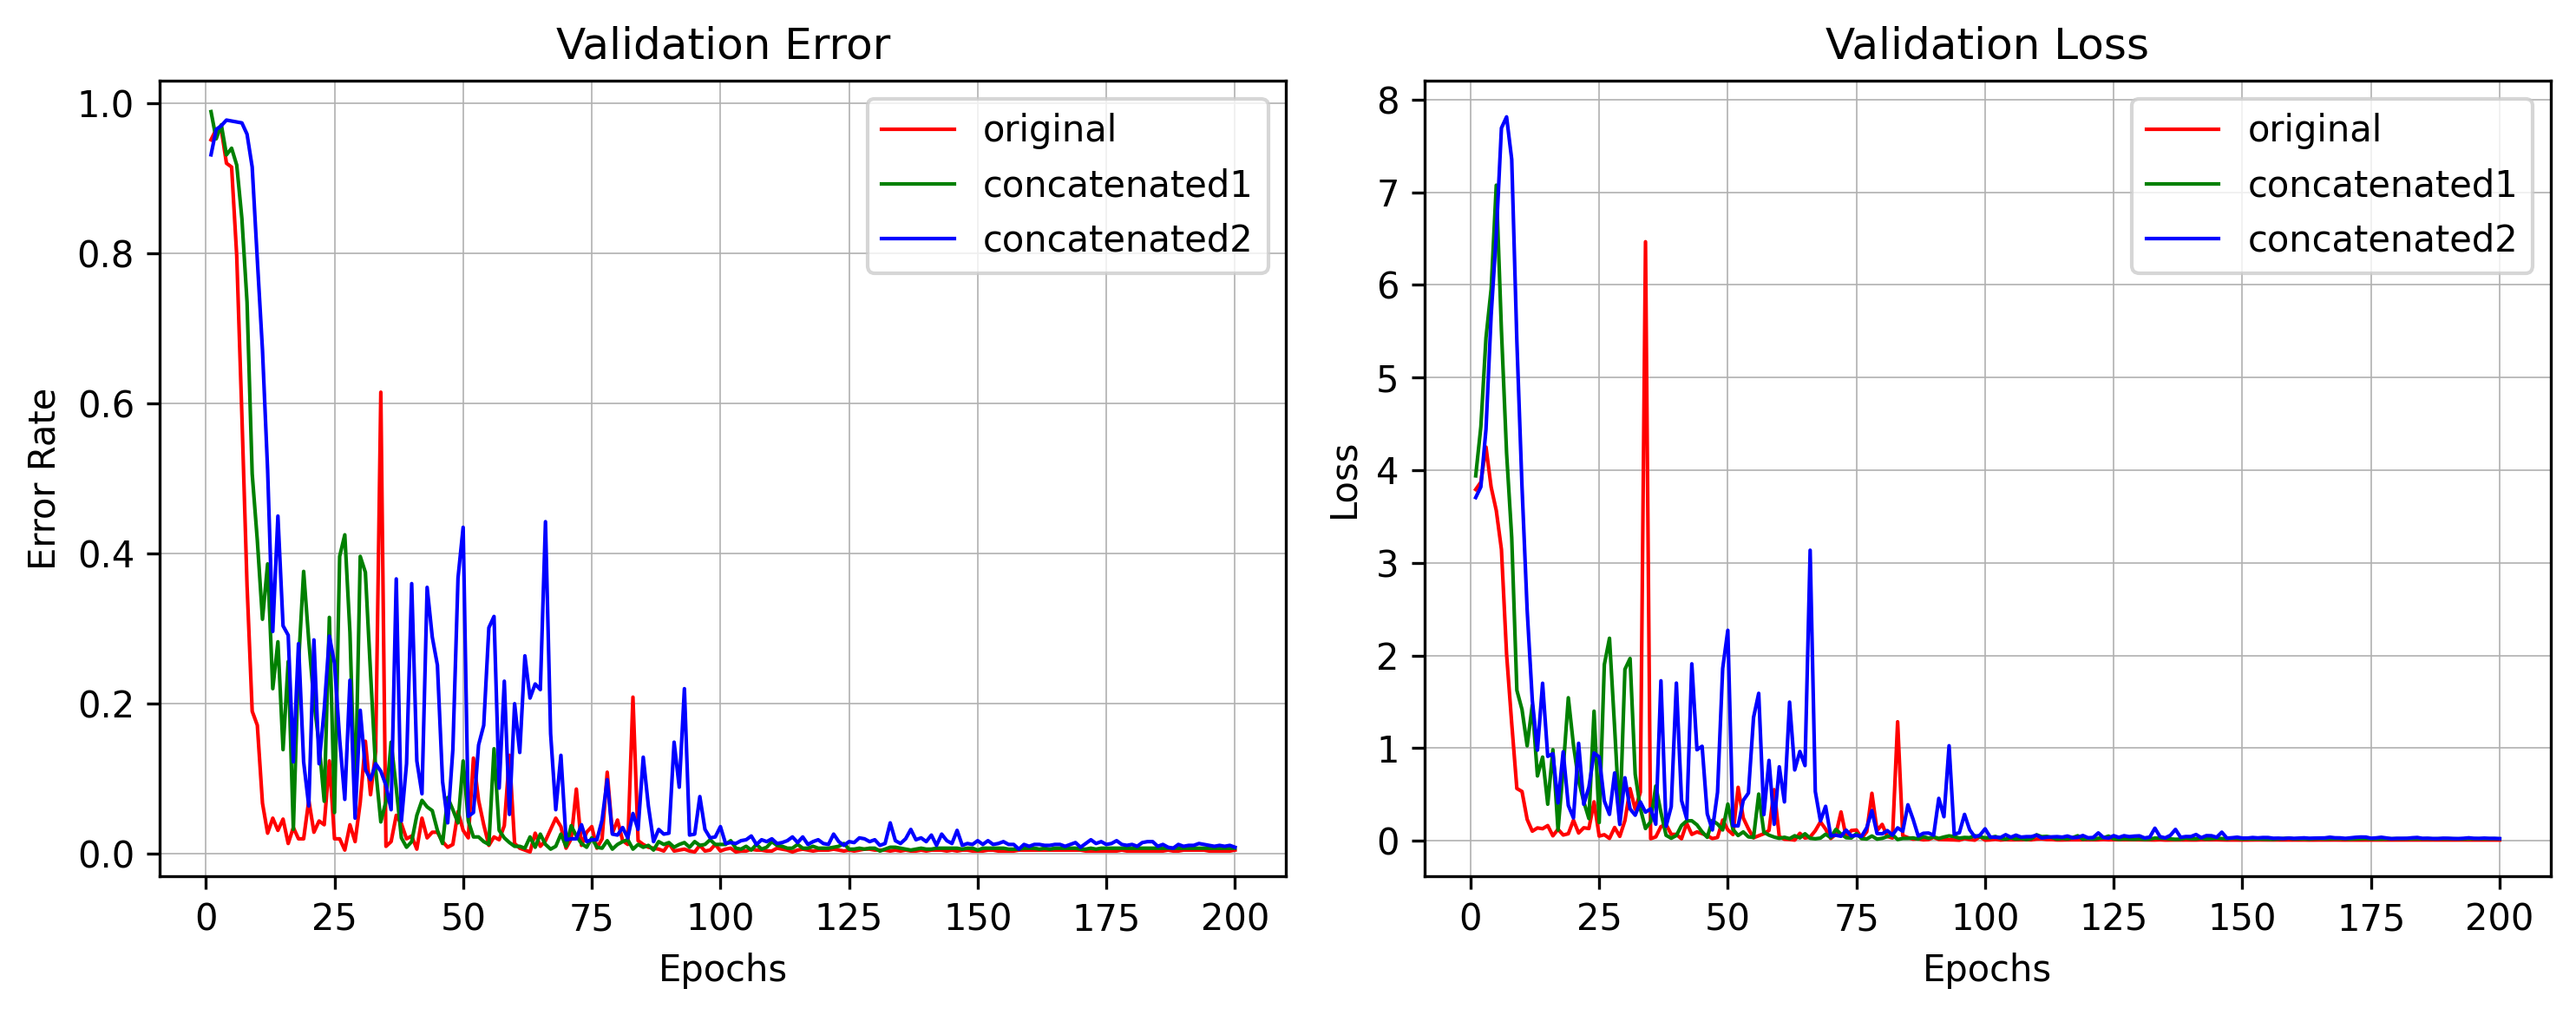

In [49]:
plot_histories(histories)

In [0]:
test_labels = np.zeros((1000, 50))
num_labels = 50

In [0]:
preds = np.zeros((num_models, test_labels.shape[0], test_labels.shape[1])) # (3, 10, 1000, 50)

for i, model_name in enumerate(model_names):
    pred = np.load(os.path.join("/content/drive/My Drive/evals", previous, model_name, "{}.npy".format(model_name))) # (1000, 50)
    preds[i] = pred

In [0]:
test_errors = np.zeros((num_models))

for i, model_name in enumerate(model_names):
    pred = np.load(os.path.join("/content/drive/My Drive/evals", previous, model_name, "{}.npy".format(model_name))) # (1000, 50)
    y = np.array(sorted([i for i in range(num_labels)] * 20)) # (1000)
    
    test_errors[i] = np.sum(np.not_equal(np.argmax(pred, axis = 1), y)) / test_labels.shape[0]

In [53]:
test_errors

array([0.008, 0.008, 0.012])

In [54]:
for i in range(num_models):
    print("[{}] avg test error: {:.4f}".format(mn[i], test_errors[i].mean()))

[original] avg test error: 0.0080
[concatenated1] avg test error: 0.0080
[concatenated2] avg test error: 0.0120


In [0]:
cmcs = np.zeros((num_models, 50)) # (3, 10, 50)

for i, model_name in enumerate(model_names):
    pred = np.load(os.path.join("/content/drive/My Drive/evals", previous, model_name, "{}.npy".format(model_name))) # (1000, 50)
    y = np.array(sorted([i for i in range(num_labels)] * 20)) # (1000)

    a = np.array([sorted(pred[j], reverse = True).index(pred[j, y[j]]) for j in range(len(y))]) # 정답의 순위    
    cmcs[i] = np.array([len(a[a<=j]) / 1000 for j in range(50)])

In [56]:
print(cmcs)

[[0.992 0.998 0.998 0.999 0.999 0.999 0.999 0.999 0.999 0.999 1.    1.
  1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
  1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
  1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
  1.    1.   ]
 [0.992 0.997 0.997 0.997 0.997 0.997 0.999 0.999 0.999 0.999 0.999 0.999
  0.999 0.999 0.999 0.999 1.    1.    1.    1.    1.    1.    1.    1.
  1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
  1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
  1.    1.   ]
 [0.988 0.997 0.998 0.998 0.998 0.998 0.998 0.998 0.998 0.999 0.999 0.999
  0.999 0.999 0.999 0.999 0.999 0.999 1.    1.    1.    1.    1.    1.
  1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
  1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
  1.    1.   ]]


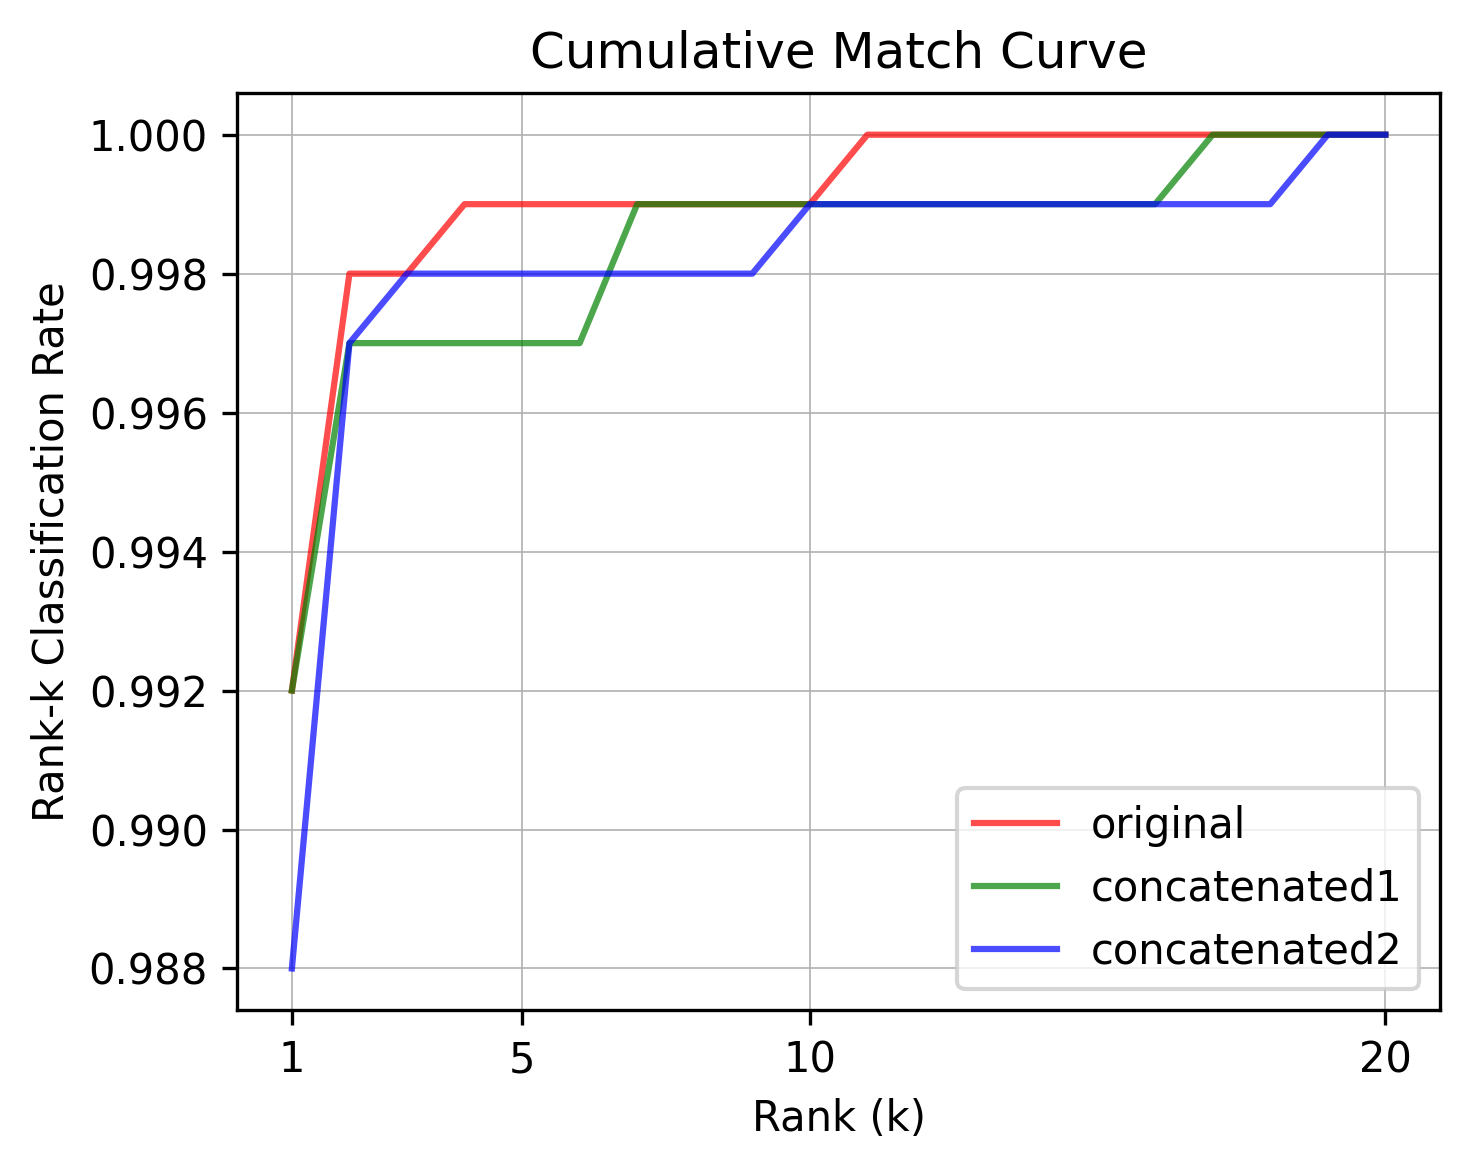

In [57]:
fig = plt.figure(figsize = (5, 4), facecolor = 'white', dpi = 300)

for i, model_cmc in enumerate(cmcs):
    c = ['r', 'g', 'b', 'm', 'k', 'c']
    # l = ["--", "-", ":", "-."]
    l = ["-"] * num_models

    plt.plot(np.arange(1, 21, 1), model_cmc[:20],
             color = c[i], label = mn[i], alpha = .7, linewidth = 1.5, linestyle = l[i])

plt.title('Cumulative Match Curve')
plt.xlabel('Rank (k)')
plt.ylabel('Rank-k Classification Rate')
plt.xticks([1, 5, 10, 20])
plt.legend()
plt.grid(True, linewidth = 0.4)

plt.tight_layout()
plt.show()

In [58]:
for i, cmc in enumerate(cmcs):
    print("[{}] top 1 error: {:.4f}, top 5 error: {:.4f}".format(mn[i], 1 - cmc[0], 1 - cmc[4]))

[original] top 1 error: 0.0080, top 5 error: 0.0010
[concatenated1] top 1 error: 0.0080, top 5 error: 0.0030
[concatenated2] top 1 error: 0.0120, top 5 error: 0.0020
